<a href="https://colab.research.google.com/github/HjayejMohamed/Time_Series/blob/main/Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense ,LSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [55]:
df=pd.read_csv('/content/AAPL.csv')

In [56]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [57]:
df1=df['close']

In [58]:
df1[:5]

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

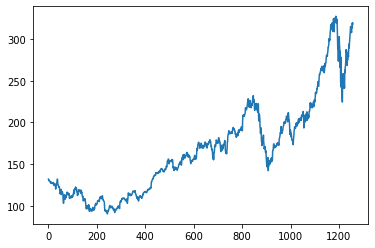

In [59]:
plt.plot(df1)

# Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
df1[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

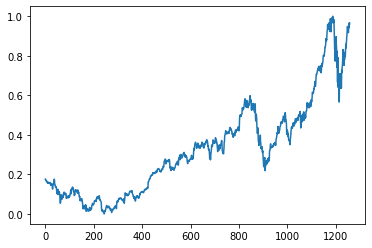

In [62]:
plt.plot(df1)

# Splitting

In [63]:
size=int(len(df)*0.8)
train_df=df1[:size]
test_df=df1[size:]

In [64]:
train_df.shape,test_df.shape

((1006, 1), (252, 1))

In [67]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [68]:
time_step = 100
X_train, y_train = create_dataset(train_df, time_step)
X_test, ytest = create_dataset(test_df, time_step)

In [69]:
X_train.shape,y_train.shape

((905, 100), (905,))

In [70]:
X_train[0]

array([0.17607447, 0.17495567, 0.16862282, 0.1696994 , 0.16727181,
       0.16794731, 0.16473866, 0.16174111, 0.1581525 , 0.15654817,
       0.16271215, 0.1614878 , 0.1554927 , 0.15443722, 0.15730811,
       0.15604154, 0.15849025, 0.15308621, 0.15735033, 0.15490163,
       0.15946129, 0.15688592, 0.1537195 , 0.14434687, 0.14812547,
       0.15308621, 0.15241071, 0.15055307, 0.14924428, 0.13607194,
       0.12551718, 0.13906949, 0.14911762, 0.14890653, 0.15401503,
       0.16115005, 0.16583636, 0.17618002, 0.17060711, 0.14725998,
       0.14700667, 0.14422021, 0.13691632, 0.13949168, 0.13784514,
       0.13522756, 0.13071012, 0.11863548, 0.10259225, 0.1058009 ,
       0.10466098, 0.10630752, 0.12403952, 0.09773706, 0.10512539,
       0.10474542, 0.10816516, 0.11323144, 0.11044499, 0.10415435,
       0.09419066, 0.06510175, 0.05395592, 0.0565735 , 0.08169383,
       0.09533058, 0.09689268, 0.09465507, 0.07337668, 0.09288187,
       0.08456472, 0.07992063, 0.09275521, 0.0836359 , 0.09385

In [71]:
y_train[0]

0.08739339694334208

In [72]:
X_train.shape,y_train.shape

((905, 100), (905,))

In [73]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [74]:
X_train.shape,X_test.shape

((905, 100, 1), (151, 100, 1))

In [75]:
X_train[0]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

# Training

In [76]:
model=Sequential([
    LSTM(50,return_sequences=True,input_shape=(100,1)),
    LSTM(50,return_sequences=True),
    LSTM(50),
    Dense(1)
    ])
model.compile(loss='mean_squared_error',optimizer='adam')

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 10s 303ms/step - loss: 0.0208 - val_loss: 0.1191
Epoch 2/100
15/15 [==============================] - 3s 193ms/step - loss: 0.0042 - val_loss: 0.0248
Epoch 3/100
15/15 [==============================] - 3s 190ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 4/100
15/15 [==============================] - 3s 181ms/step - loss: 0.0011 - val_loss: 0.0084
Epoch 5/100
15/15 [==============================] - 3s 187ms/step - loss: 9.5824e-04 - val_loss: 0.0095
Epoch 6/100
15/15 [==============================] - 3s 184ms/step - loss: 9.5655e-04 - val_loss: 0.0078
Epoch 7/100
15/15 [==============================] - 3s 185ms/step - loss: 9.0056e-04 - val_loss: 0.0079
Epoch 8/100
15/15 [==============================] - 3s 184ms/step - loss: 8.7991e-04 - val_loss: 0.0097
Epoch 9/100
15/15 [==============================] - 3s 178ms/step - loss: 8.3344e-04 - val_loss: 0.0084
Epoch 10/100
15/15 [==============================] - 3s 185ms/step - 

#Prediction

In [86]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [87]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [88]:
X_train.shape,y_train.shape

((905, 100, 1), (905,))

In [89]:
mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_pred)

12.9759874671921

In [84]:
scaler.inverse_transform(y_train[0].reshape(1,-1)),train_pred[0]

(array([[111.04]]), array([91.693184], dtype=float32))